# **Video Game Sales Analysis**


# Project Description
This project analyzes global video game sales data to understand trends across
years, regions, platforms, genres, and publishers using Exploratory Data Analysis (EDA).

# **DATA LOADING**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgsales.csv to vgsales.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## DATA UNDERSTANDING

In [ ]:
df.shape

(16598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


The dataset contains information about video games including sales across
different regions, platforms, genres, and publishers.

# **DATA CLEANING/PREPROCESSING**

## Data Preprocessing

The dataset was checked for missing values.
Missing values were found in the 'Year' column and those rows were removed to ensure accurate year-wise analysis.

The data types of all columns were verified.
No duplicate records were found in the dataset.

Additional preprocessing steps were performed to improve data quality.
A new column named 'Total_Regional_Sales' was created by combining NA, EU, JP,
and Other sales. This helps in validating global sales values and supports
better regional comparison.

In [ ]:
### MISSING VALUES CHECK

In [ ]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Missing values were identified, mainly in the Year column.

In [ ]:
### HANDLE MISSING YEAR VALUE

In [ ]:
df = df.dropna(subset=["Year"])

## Rows with missing Year values were removed to ensure accurate time-based analysis

In [ ]:
### DATA TYPE CONVERSION

In [ ]:
df["Year"] = df["Year"].astype(int)

## The Year column was converted to integer format for consistency.

In [ ]:
### DUPLICATE CHECK

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

## Duplicate records were checked and removed to avoid biased analysis.

In [ ]:
### TOTAL_REGIONAL CHECK

In [ ]:
df['Total_Regional_Sales'] = (
    df['NA_Sales'] +
    df['EU_Sales'] +
    df['JP_Sales'] +
    df['Other_Sales']
)

df[['Total_Regional_Sales', 'Global_Sales']].head()

,Total_Regional_Sales,Global_Sales
0,82.74,82.74
1,40.24,40.24
2,35.83,35.82
3,33.00,33.00
4,31.38,31.37


## **FINAL** **PREPROCESSING** **SUMMARY**

The dataset was cleaned by handling missing values, verifying data types, checking duplicates, and creating new features.
These preprocessing steps ensure the dataset is consistent, accurate, and ready for exploratory data analysis.

# **EXPLORATORY DATA ANALYSIS (EDA)**

Exploratory Data Analysis (EDA) was performed to understand patterns, trends, and relationships in the video game sales dataset.
Through aggregation, visualization, and interpretation, this phase helps identify key factors influencing global video game sales across years, platforms, genres, and regions.

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.groupby("Year")["Global_Sales"].sum().head()

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36


In [ ]:
df.groupby("Platform")["Global_Sales"].mean().sort_values(ascending=False)

,Global_Sales
Platform,
GB,2.606633
NES,2.561939
GEN,1.050370
SNES,0.837029
PS4,0.827679
X360,0.774672
2600,0.729925
PS3,0.720722
Wii,0.699404


In [ ]:
df.groupby("Genre")["Global_Sales"].max()

,Global_Sales
Genre,
Action,21.40
Adventure,11.18
Fighting,13.04
Misc,29.02
Platform,40.24
Puzzle,30.26
Racing,35.82
Role-Playing,31.37
Shooter,28.31


In [ ]:
pd.pivot_table(
    df,
    values=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    index="Genre",
    aggfunc="sum"
)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales
Genre,,,,
Action,525.00,159.95,877.83,187.38
Adventure,64.13,52.07,105.80,16.81
Fighting,101.32,87.35,223.59,36.68
Misc,215.98,107.76,410.24,75.32
Platform,201.63,130.77,447.05,51.59
Puzzle,50.78,57.31,123.78,12.55
Racing,238.39,56.69,359.42,77.27
Role-Playing,188.06,352.31,327.28,59.61
Shooter,313.27,38.28,582.60,102.69


## **1)YEAR-WISE GLOBAL SALES**

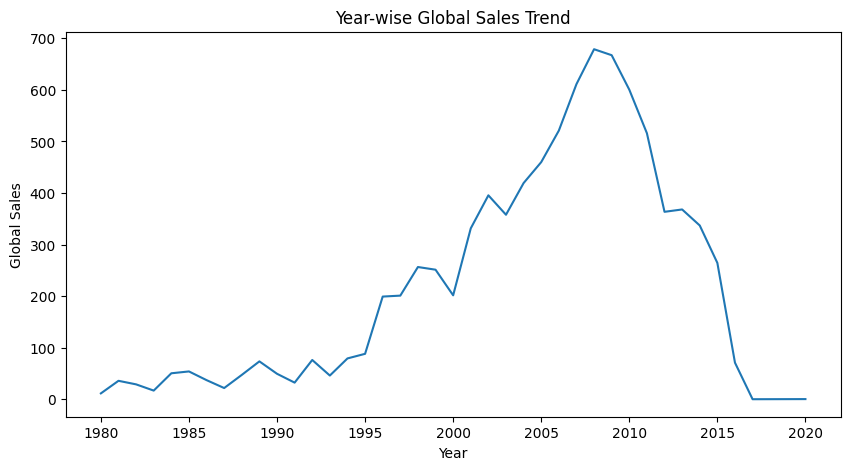

In [ ]:
yearly_sales = df.groupby("Year")["Global_Sales"].sum()

plt.figure(figsize=(10,5))
yearly_sales.plot()
plt.title("Year-wise Global Sales Trend")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()

INSIGHT:

Global video game sales show a strong growth during the mid-2000s,
followed by a gradual decline in recent years.

## **2) TOP 10 PLATFORMS BY GLOBAL SALES**

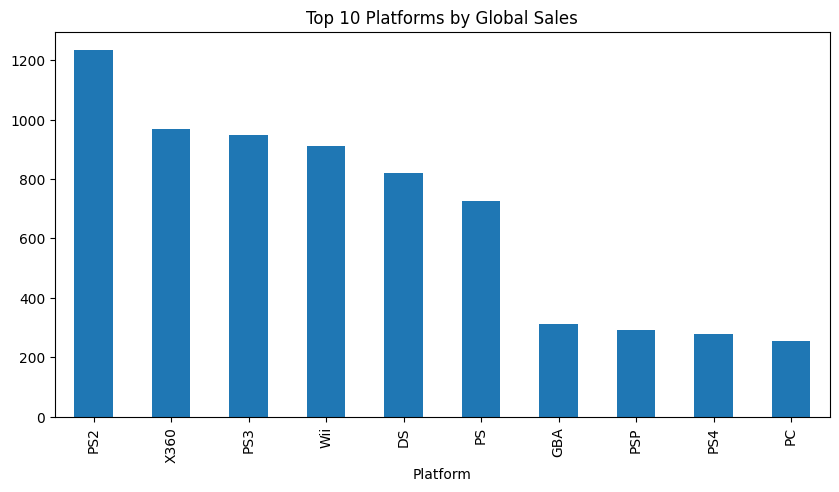

In [ ]:
top_platforms = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(10)

top_platforms.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Platforms by Global Sales")
plt.show()

INSIGHT:

strong consumer preference for these platforms.

# **3) TOP 10 GENRES BY GLOBAL SALES**

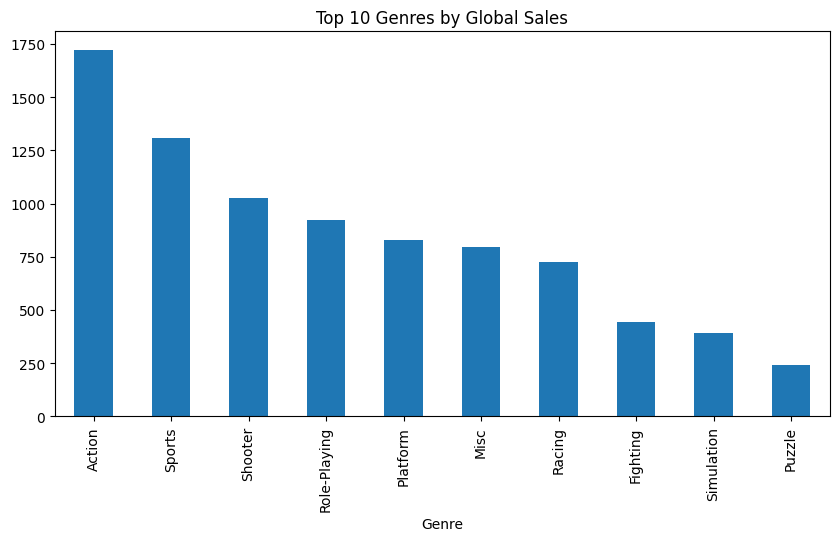

In [ ]:
top_genres = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False).head(10)

top_genres.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Genres by Global Sales")
plt.show()

INSIGHT:

Action and Sports genres generate the highest global sales, indicating strong consumer preference for fast-paced and competitive gameplay. Shooter and Role-Playing genres also show significant sales, reflecting sustained interest among gamers. On the other hand, Puzzle and Simulation genres record comparatively lower sales, suggesting a niche audience.

## **4) TOP 10 PUBLISHERS BY GLOBAL SALES**

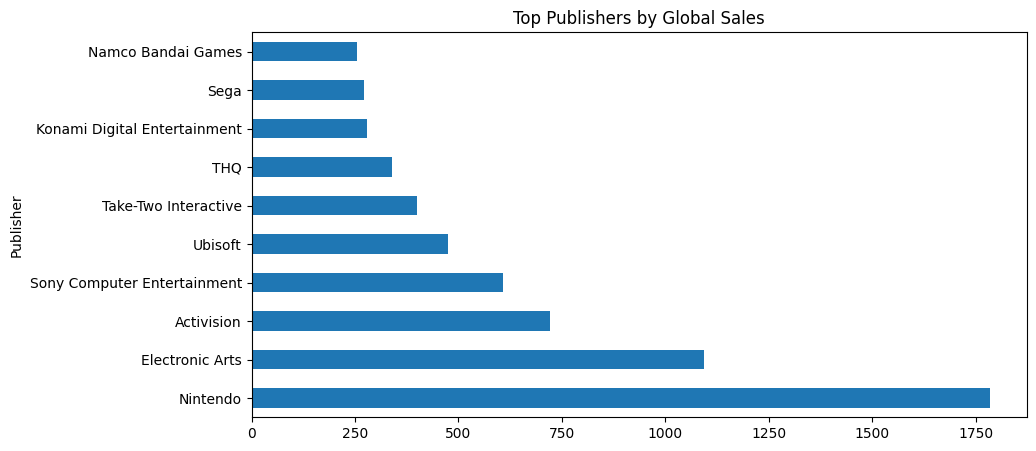

In [ ]:
top_publishers = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)

top_publishers.plot(kind="barh", figsize=(10,5))
plt.title("Top Publishers by Global Sales")
plt.show()

INSIGHT:

Nintendo and Electronic Arts are the leading publishers in terms
of global video game sales.

# 5) REGION-WISE SALES DISTRIBUTION

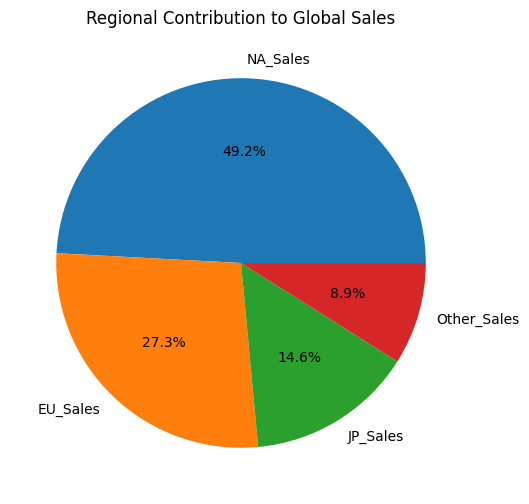

In [ ]:
region_sales = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

plt.figure(figsize=(6,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Regional Contribution to Global Sales")
plt.show()

INSIGHT:

North America contributes the largest share of global video game sales, making it the dominant market.
Europe is the second largest contributor, while Japan and Other regions account for a smaller portion of sales.
This indicates that the global video game market is largely driven by North America and Europe.

## **6) TOTAL REGIONAL SALES CHECK**

In [ ]:
df["Total_Regional_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]
df[["Global_Sales","Total_Regional_Sales"]].head()

,Global_Sales,Total_Regional_Sales
0,82.74,82.74
1,40.24,40.24
2,35.82,35.83
3,33.00,33.00
4,31.37,31.38


INSIGHT:

The verification confirms that the dataset is reliable and internally consistent, making it suitable for further analysis and visualization.

## **7) PLATFORM-WISE SALES TREND OVER YEAR**

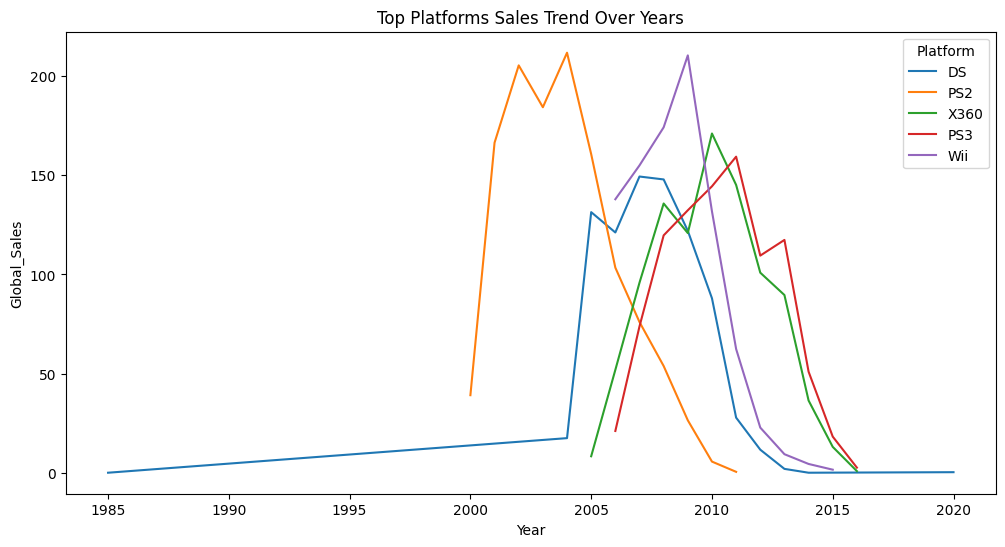

In [ ]:
platform_year_sales = df.groupby(["Year","Platform"])["Global_Sales"].sum().reset_index()

top5_platforms = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(5).index
filtered = platform_year_sales[platform_year_sales["Platform"].isin(top5_platforms)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered, x="Year", y="Global_Sales", hue="Platform")
plt.title("Top Platforms Sales Trend Over Years")
plt.show()

INSIGHT:

Platform-wise analysis shows that console platforms dominate sales during their peak release periods, followed by gradual decline as newer platforms enter the market.
This reflects the competitive and evolving nature of the video game industry.

## **8) GENRE VS REGION ANALYSIS**

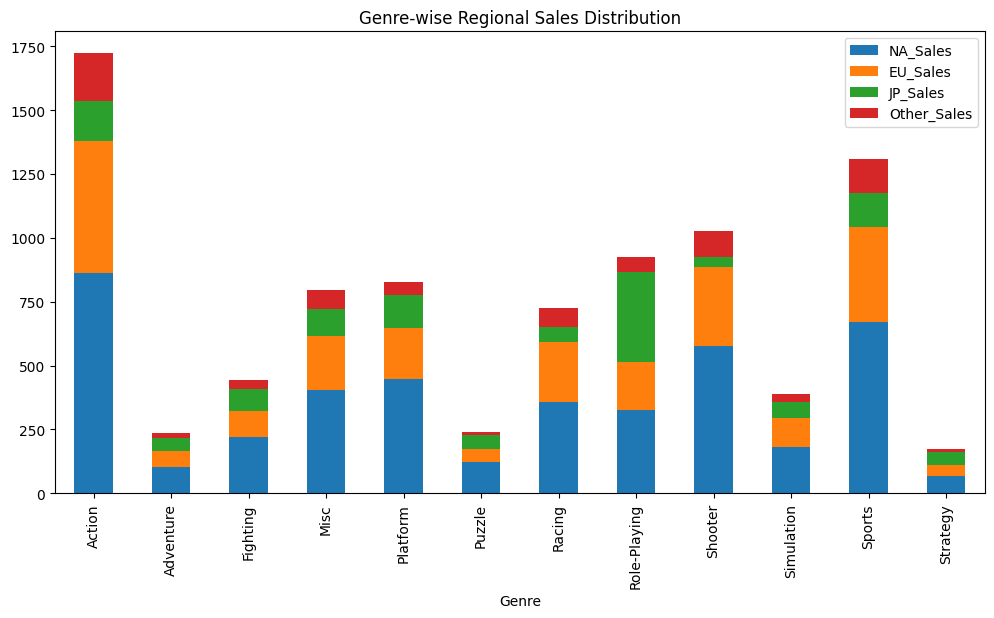

In [ ]:
genre_region = df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

genre_region.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Genre-wise Regional Sales Distribution")
plt.show()

INSIGHT:
North America and Europe dominate sales for Action and Sports genres, while Japan shows a higher preference for Role-Playing games.
This indicates that regional market preferences strongly influence genre performance.

## **9) PUBLISHER DOMINANCE OVER TIME**

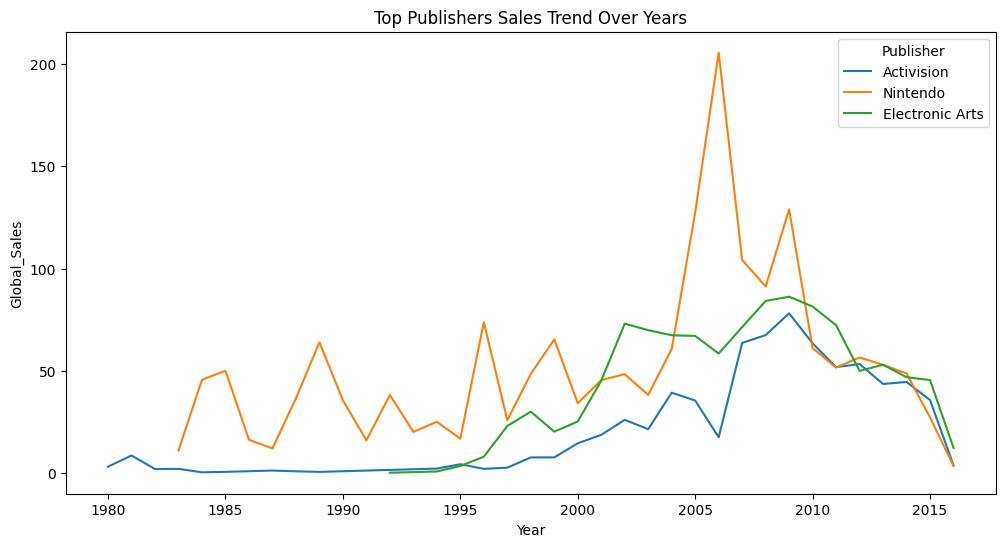

In [ ]:
publisher_year = df.groupby(["Year","Publisher"])["Global_Sales"].sum().reset_index()
top_publishers = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(3).index

filtered_pub = publisher_year[publisher_year["Publisher"].isin(top_publishers)]

plt.figure(figsize=(12,6))
sns.lineplot(data=filtered_pub, x="Year", y="Global_Sales", hue="Publisher")
plt.title("Top Publishers Sales Trend Over Years")
plt.show()

INSIGHT:

Nintendo consistently dominates global sales across multiple years,
highlighting strong brand presence and franchise success.

## **10) CORRELATION ANALYSIS**

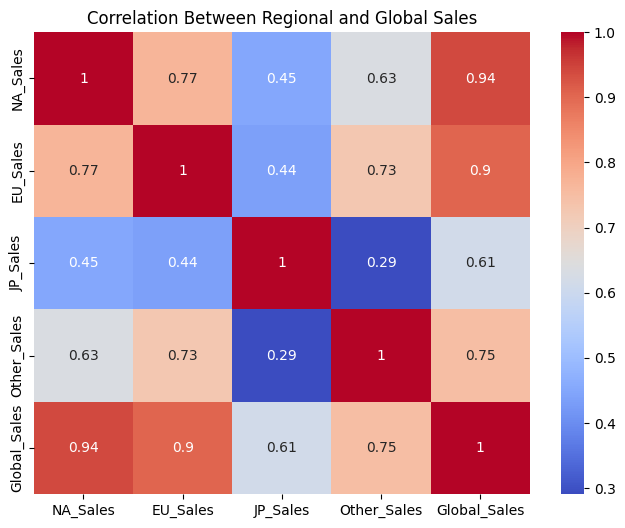

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Regional and Global Sales")
plt.show()

INSIGHT:

Global sales are strongly correlated with North American and European sales,
indicating that these regions heavily influence worldwide performance.

# **11) TOP GAME ANALYSIS**

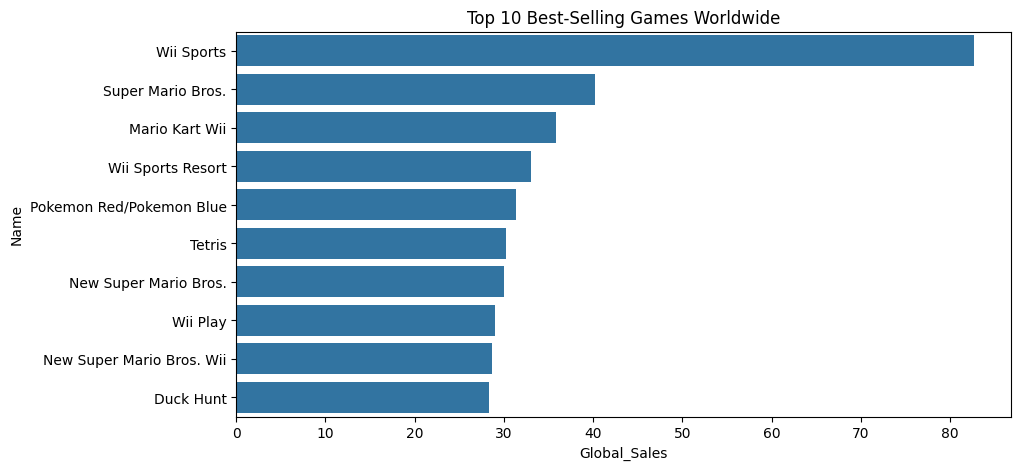

In [ ]:
top_games = df.sort_values("Global_Sales", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x="Global_Sales", y="Name", data=top_games)
plt.title("Top 10 Best-Selling Games Worldwide")
plt.show()

INSIGHT:

Games like Wii Sports and Mario Kart dominate global sales,
demonstrating the impact of exclusive titles.

# **12) DISTRIBUTION ANALYSIS**

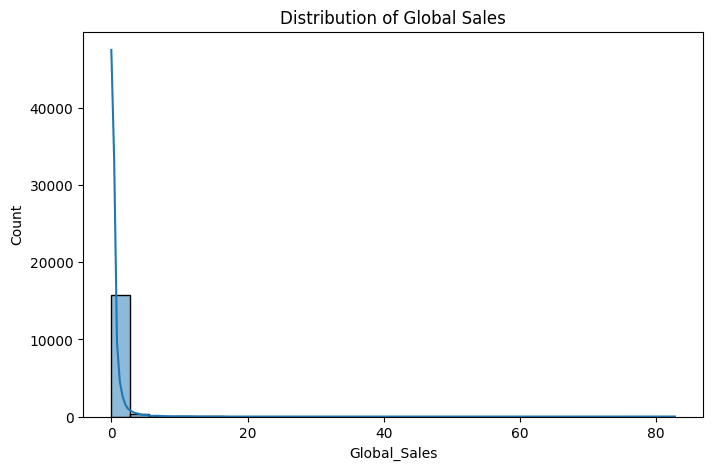

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Global_Sales"], bins=30, kde=True)
plt.title("Distribution of Global Sales")
plt.show()

INSIGHT:

Most video games have low global sales, while a small number of games
achieve extremely high sales, indicating a right-skewed distribution.

# **13) OUTLIER ANALYSIS**

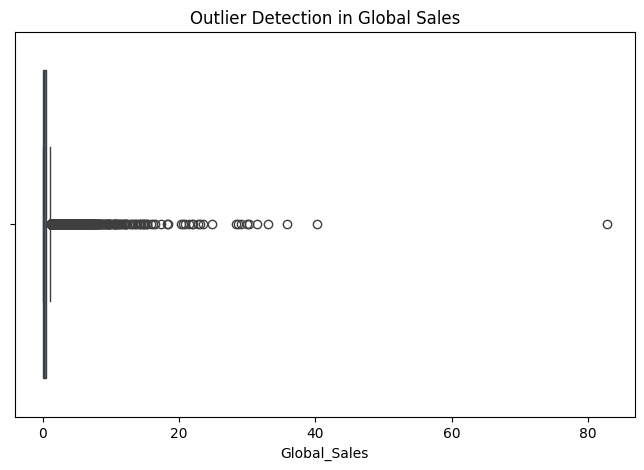

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Global_Sales"])
plt.title("Outlier Detection in Global Sales")
plt.show()

INSIGHT:

The boxplot shows the presence of outliers, representing blockbuster games
that significantly outperform average sales.


# **14) PLATFORM VS YEAR**

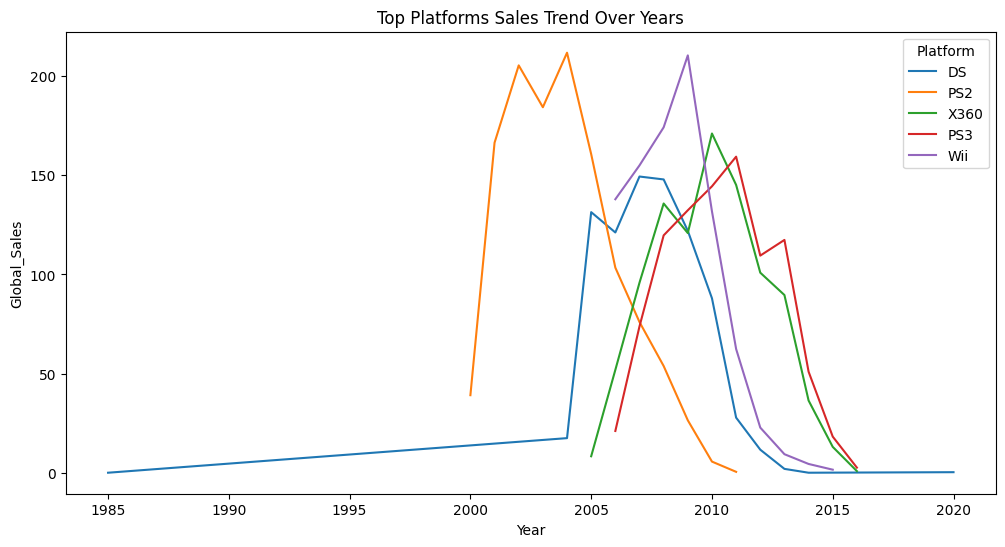

In [ ]:
top_platforms = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False).head(5).index

platform_year = df[df["Platform"].isin(top_platforms)]
platform_year = platform_year.groupby(["Year","Platform"])["Global_Sales"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=platform_year, x="Year", y="Global_Sales", hue="Platform")
plt.title("Top Platforms Sales Trend Over Years")
plt.show()

INSIGHT:

Platforms such as Wii and PS2 dominated sales during their peak years,
but sales declined as newer platforms entered the market.

## **15) TOP 5 PLATFORMS-SALES TREND OVER YEARS**

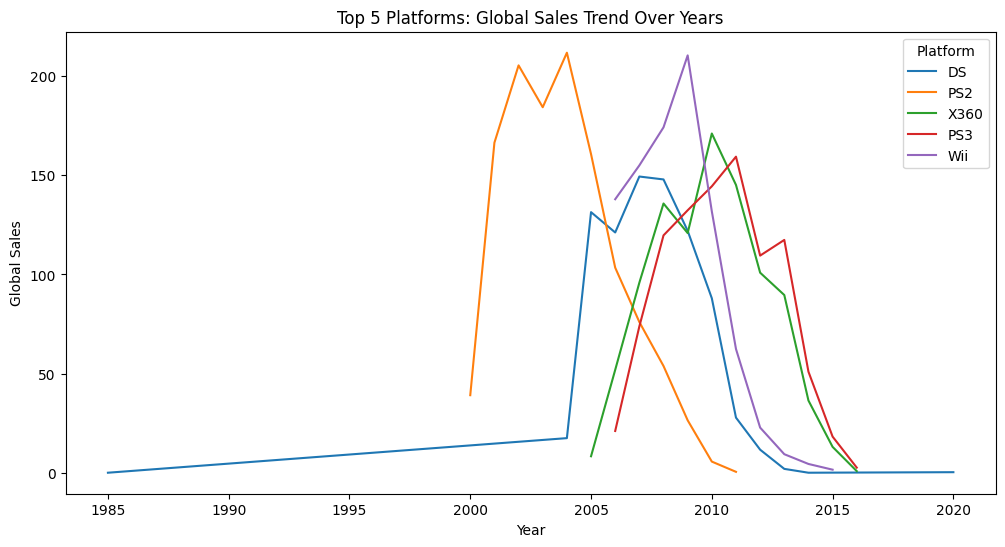

In [ ]:
top5_platforms = (
    df.groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

platform_year_sales = (
    df[df["Platform"].isin(top5_platforms)]
    .groupby(["Year", "Platform"])["Global_Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=platform_year_sales,
    x="Year",
    y="Global_Sales",
    hue="Platform"
)
plt.title("Top 5 Platforms: Global Sales Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()

INSIGHT:

This analysis shows how the top gaming platforms performed over time.
Platforms such as PS2, Wii, and Xbox 360 experienced rapid growth,
reached peak sales during the mid-2000s, and then declined as newer
platforms entered the market. This highlights the lifecycle nature
of gaming platforms.

# **EDA SUMMARY**

The analysis revealed that North America and Europe dominate global video game sales.  
Action and Sports genres show the highest aggregated sales.  
Nintendo and Electronic Arts lead among publishers.  
The trend of sales over the years highlights peaks in mid-2000s and a gradual decline later.

# **CONCLUSION**

This project analyzed global video game sales data to understand trends across
years, platforms, genres, publishers, and regions. The analysis revealed that
North America and Europe contribute the largest share of global sales, while
Action and Sports genres consistently perform well across markets. Major
publishers such as Nintendo dominate global sales due to strong franchises
and brand loyalty. Overall, the study highlights how platform lifecycle,
regional preferences, and genre popularity influence video game sales

# **FUTURE SCOPE**

• Machine learning models can be used to predict future video game sales.  
• User ratings and reviews can be included to analyze customer sentiment.  
• Mobile and digital-only game sales can be added for a more comprehensive study.  
• Region-wise platform prediction can be performed to support business decisions.

# **PROJECT SUMMARY**

# Project Title: Video Game Sales Analysis  
Tool Used: Python (Google Colab)  
Libraries: Pandas, Matplotlib, Seaborn  
Dataset Source: Kaggle - Video Game Sales Dataset  

This project involved data loading, preprocessing, exploratory data analysis,
advanced visualizations, and interpretation of insights. The analysis provided
a clear understanding of sales trends, regional behavior, platform performance,
and genre popularity in the global video game industry.